In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

### Preliminary analysis

In [2]:
df=pd.read_csv('2024_03_25_-_epfl_fin413_crypto_portfolio_construction_-_project_dataset.csv',skiprows=1,index_col='time')
df.index=pd.to_datetime(df.index)
df.head()


,ADA,BCH,BTC,DOGE,ETH,LINK,LTC,MANA,XLM,XRP,SPXT,XCMP,USSOC,VIX
time,,,,,,,,,,,,,,
2017-10-02,0.027392,0.008261,-0.000402,-0.023234,-0.023491,-0.181214,-0.027555,-0.203082,-0.062725,-0.024964,0.00388,0.00320,0.00168,-0.00631
2017-10-03,-0.194745,-0.042087,-0.019799,-0.026641,-0.016846,-0.033296,-0.021392,0.166436,-0.045385,0.000985,0.00220,0.00238,0.00126,0.00635
2017-10-04,0.050384,-0.115200,-0.022141,-0.008798,-0.000445,0.134588,-0.017833,-0.144464,-0.048348,0.050172,0.00131,0.00060,0.00501,0.01262
2017-10-05,-0.016903,-0.004159,0.024363,-0.006903,0.011348,0.033163,0.008200,-0.063668,0.226926,0.114754,0.00582,0.00778,0.00624,-0.04569
2017-10-06,-0.140799,0.025370,0.011686,0.016882,0.045222,0.155556,0.008521,-0.398374,0.268461,-0.019328,-0.00076,0.00075,0.00413,0.05005


In [3]:
df.describe()

,ADA,BCH,BTC,DOGE,ETH,LINK,LTC,MANA,XLM,XRP,SPXT,XCMP,USSOC,VIX
count,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000,2357.000000
mean,0.003617,0.002577,0.001889,0.005301,0.002214,0.003892,0.001615,0.005333,0.002936,0.002351,0.000404,0.000485,0.001163,0.002414
std,0.071039,0.078500,0.037976,0.106470,0.047708,0.068262,0.053650,0.098022,0.065904,0.064163,0.010491,0.012477,0.031419,0.070820
min,-0.416604,-0.561220,-0.381176,-0.381441,-0.434196,-0.446130,-0.372634,-0.481355,-0.336443,-0.416219,-0.119800,-0.123200,-0.438740,-0.233740
25%,-0.027778,-0.024771,-0.014421,-0.023272,-0.019603,-0.032381,-0.024653,-0.034483,-0.025709,-0.022231,-0.001530,-0.001930,0.000000,-0.026140
50%,0.000395,-0.000187,0.000936,-0.000402,0.000782,0.001545,0.000291,0.000000,0.000117,0.000144,0.000000,0.000000,0.000000,0.000000
75%,0.027723,0.024345,0.017658,0.020976,0.024600,0.034688,0.025303,0.034521,0.024521,0.021583,0.003480,0.004910,0.002810,0.014180
max,1.368108,2.000324,0.225515,3.923036,0.279043,0.626957,0.531276,2.184411,0.914894,0.855803,0.093940,0.093540,0.498210,1.155980


In [4]:
df.isna().sum()

ADA      0
BCH      0
BTC      0
DOGE     0
ETH      0
LINK     0
LTC      0
MANA     0
XLM      0
XRP      0
SPXT     0
XCMP     0
USSOC    0
VIX      0
dtype: int64

In [5]:
df_monthly=df.resample('1m').mean()

In [6]:
traditional_monthly=df_monthly[df_monthly.columns[-4:]]
crypto_monthly=df_monthly[df_monthly.columns[:-4]]

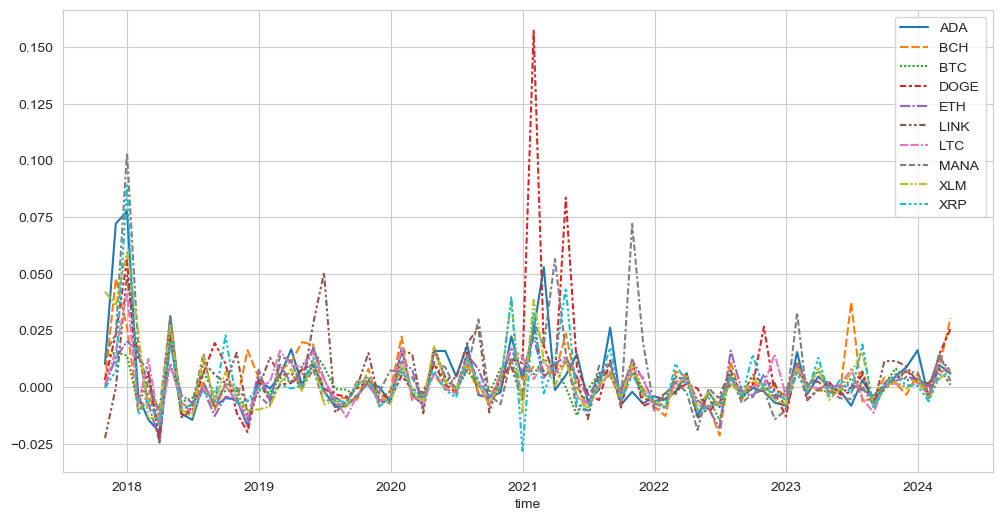

In [7]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(crypto_monthly)
plt.show()

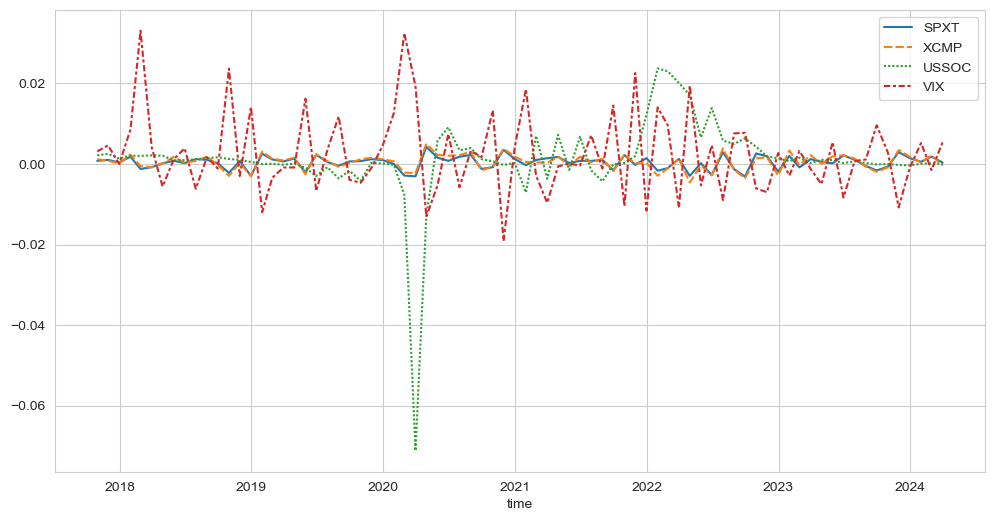

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(traditional_monthly)
plt.show()

## 1a: Resolving the issue of compound or linear returns

Taking a look at volatilies per crypto stock and per year to have a better understanding of what the most volatile stock is and when was the crypto market most volatile

In [9]:
crypto_daily=df[df.columns[:-4]]
crypto_desc=crypto_daily.describe()
crypto_desc.loc['std'].sort_values(ascending=False)*100

DOGE    10.646960
MANA     9.802204
BCH      7.849973
ADA      7.103899
LINK     6.826224
XLM      6.590438
XRP      6.416266
LTC      5.365015
ETH      4.770765
BTC      3.797611
Name: std, dtype: float64

In [10]:
crypto_volatility=crypto_daily.groupby(crypto_daily.index.year).std()*100
crypto_volatility.mean(axis=1)

time
2017    13.666847
2018     7.585144
2019     4.995155
2020     5.788375
2021     8.944415
2022     4.730837
2023     3.687702
2024     4.260672
dtype: float64

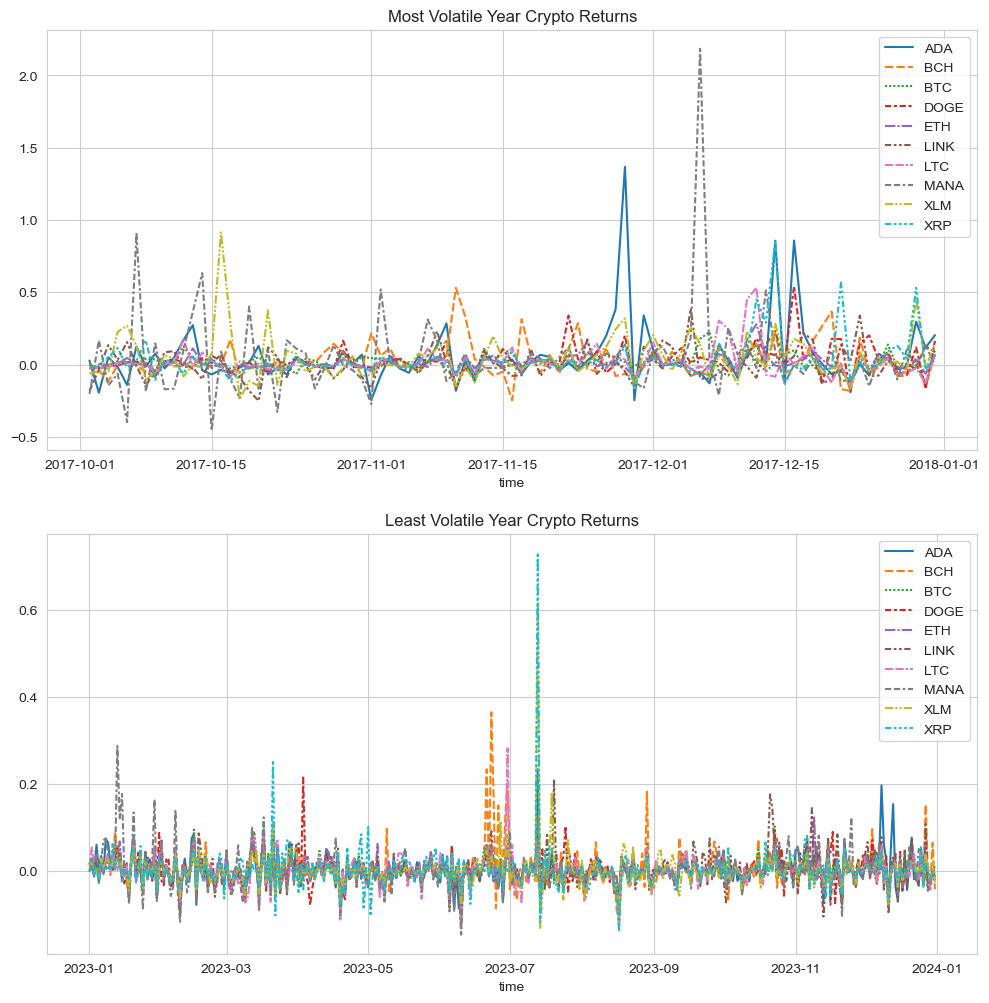

<Figure size 1200x600 with 0 Axes>

In [11]:
fig,axs=plt.subplots(2,1,figsize=(12,12))
plt.figure(figsize=(12,6))
sns.lineplot(crypto_daily[crypto_daily.index.year==2017],ax=axs[0])
axs[0].set_title('Most Volatile Year Crypto Returns')
sns.lineplot(crypto_daily[crypto_daily.index.year==2023],ax=axs[1])
axs[1].set_title('Least Volatile Year Crypto Returns')
plt.show()


In [12]:
crypto_daily.apply(lambda x: np.log(x+1))

,ADA,BCH,BTC,DOGE,ETH,LINK,LTC,MANA,XLM,XRP
time,,,,,,,,,,
2017-10-02,0.027023,0.008227,-0.000402,-0.023508,-0.023771,-0.199933,-0.027941,-0.227003,-0.064779,-0.025281
2017-10-03,-0.216596,-0.042999,-0.019997,-0.027003,-0.016989,-0.033863,-0.021625,0.153953,-0.046447,0.000984
2017-10-04,0.049156,-0.122394,-0.022390,-0.008837,-0.000446,0.126269,-0.017994,-0.156027,-0.049556,0.048954
2017-10-05,-0.017047,-0.004168,0.024071,-0.006927,0.011284,0.032625,0.008166,-0.065785,0.204512,0.108634
2017-10-06,-0.151753,0.025053,0.011618,0.016741,0.044229,0.144581,0.008484,-0.508119,0.237804,-0.019517
...,...,...,...,...,...,...,...,...,...,...
2024-03-11,0.077498,0.056399,0.043549,0.066445,0.046284,-0.020005,0.170677,0.010710,0.119847,0.171971
2024-03-12,-0.035188,-0.031568,-0.009006,-0.078853,-0.021460,-0.027634,-0.062191,-0.015131,-0.054102,-0.049198
2024-03-13,0.021549,0.018487,0.023085,0.005337,0.007019,0.003376,-0.002874,-0.008506,0.010660,0.002033


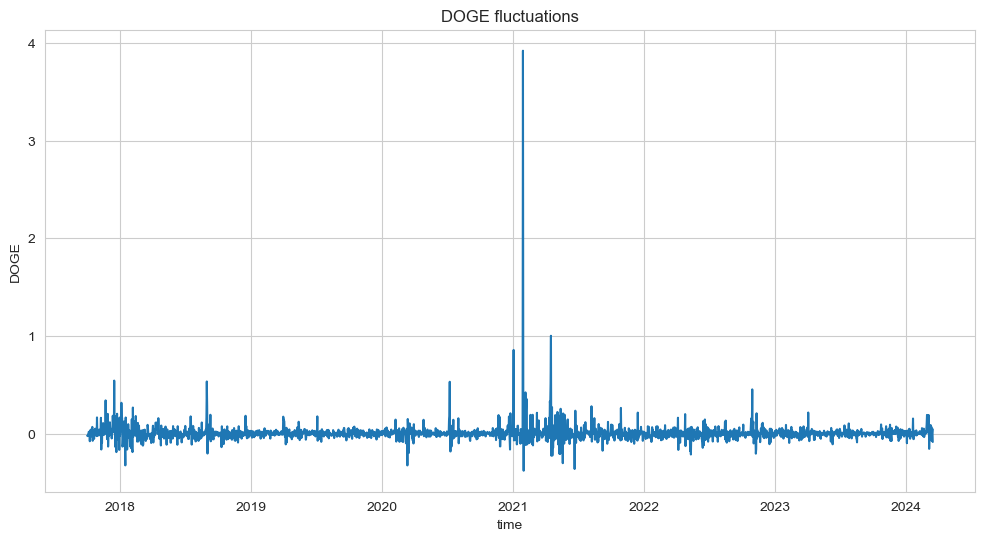

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(crypto_daily['DOGE'])
plt.title('DOGE fluctuations')
plt.show()

Given that linear returns $L_t$= $V_{t+1}/V_t  -1$  and compound $C_t$= ln($V_{t+1}/V_t$) we can say that $C_t$= ln($L_t +1 $)

In [14]:
crypto_log=crypto_daily.apply(lambda x: np.log(x+1))

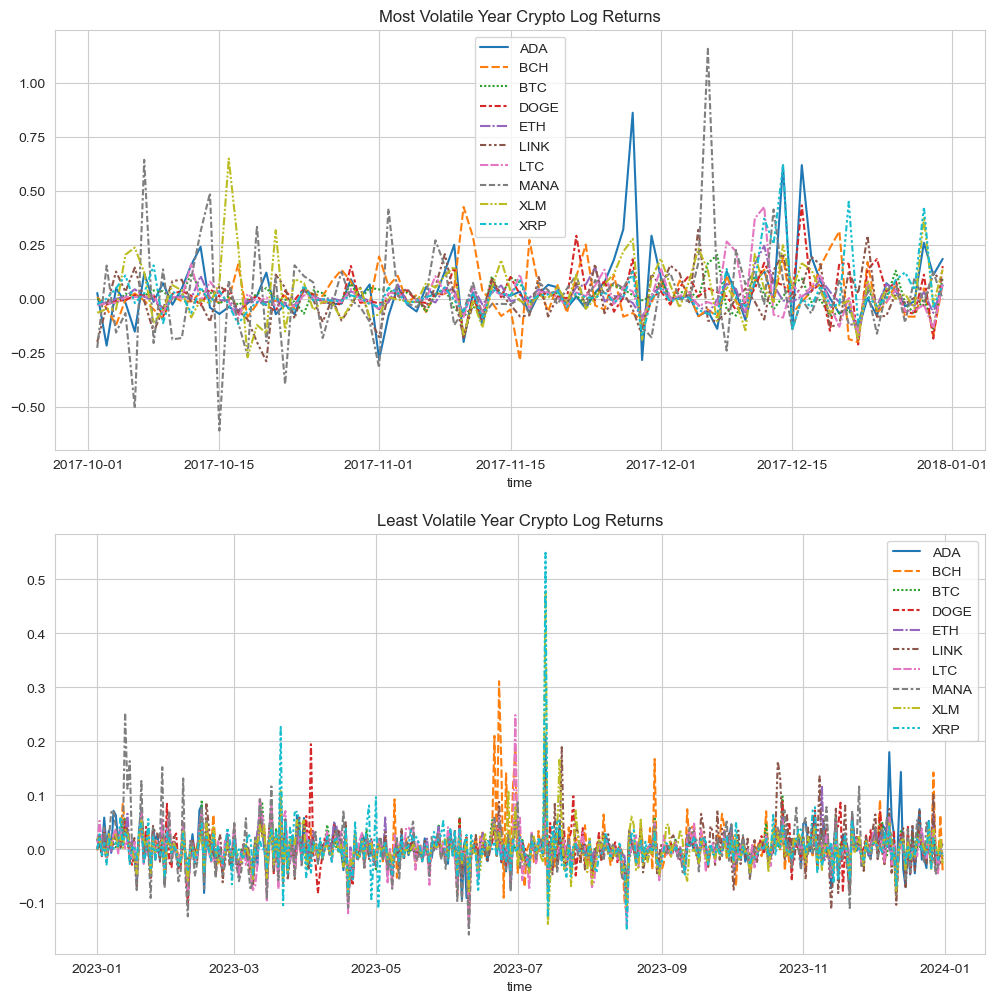

<Figure size 1200x600 with 0 Axes>

In [15]:
fig,axs=plt.subplots(2,1,figsize=(12,12))
plt.figure(figsize=(12,6))
sns.lineplot(crypto_log[crypto_log.index.year==2017],ax=axs[0])
axs[0].set_title('Most Volatile Year Crypto Log Returns')
sns.lineplot(crypto_log[crypto_log.index.year==2023],ax=axs[1])
axs[1].set_title('Least Volatile Year Crypto Log Returns')
plt.show()

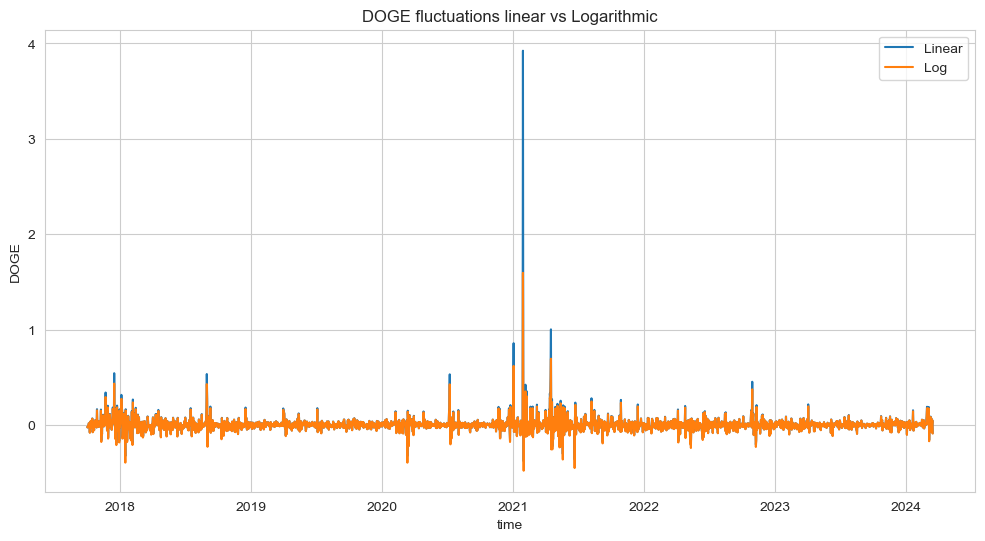

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(crypto_daily['DOGE'],label='Linear')
sns.lineplot(crypto_log['DOGE'],label='Log')
plt.title('DOGE fluctuations linear vs Logarithmic')
plt.show()

In [17]:
crypto_log.describe().loc['std'].sort_values(ascending=False)*100

MANA    8.404629
DOGE    7.277371
BCH     7.040201
LINK    6.745366
ADA     6.481801
XLM     6.173982
XRP     6.049462
LTC     5.314924
ETH     4.832827
BTC     3.834997
Name: std, dtype: float64

## 1b get investment insight

## 1c

In [18]:
equity_monthly=df_monthly[['SPXT','XCMP']]
equity_monthly.head(12)

,SPXT,XCMP
time,,
2017-10-31,0.000772,0.001195
2017-11-30,0.001013,0.000784
2017-12-31,0.000361,0.000163
2018-01-31,0.001808,0.002321
2018-02-28,-0.001244,-0.000524
2018-03-31,-0.000778,-0.000838
2018-04-30,0.000168,0.000083
2018-05-31,0.000783,0.001741
2018-06-30,0.000214,0.000348


## 1d Weekend values

In [19]:
traditional_daily=df[df.columns[-4:,]]
traditional_daily.head(14)

,SPXT,XCMP,USSOC,VIX
time,,,,
2017-10-02,0.00388,0.00320,0.00168,-0.00631
2017-10-03,0.00220,0.00238,0.00126,0.00635
2017-10-04,0.00131,0.00060,0.00501,0.01262
2017-10-05,0.00582,0.00778,0.00624,-0.04569
2017-10-06,-0.00076,0.00075,0.00413,0.05005
2017-10-07,0.00000,0.00000,0.00000,0.00000
2017-10-08,0.00000,0.00000,0.00000,0.00000
2017-10-09,-0.00180,-0.00159,0.00082,0.07047
2017-10-10,0.00235,0.00115,0.00082,-0.02420


In [21]:
traditional_daily.replace(0.000000,np.nan,inplace=True)
traditional_daily.interpolate('linear',inplace=True)
traditional_daily.head(14)

C:\Users\Kamal\AppData\Local\Temp\ipykernel_20524\2553023866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traditional_daily.replace(0.000000,np.nan,inplace=True)
C:\Users\Kamal\AppData\Local\Temp\ipykernel_20524\2553023866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traditional_daily.interpolate('linear',inplace=True)


,SPXT,XCMP,USSOC,VIX
time,,,,
2017-10-02,0.003880,0.003200,0.001680,-0.006310
2017-10-03,0.002200,0.002380,0.001260,0.006350
2017-10-04,0.001310,0.000600,0.005010,0.012620
2017-10-05,0.005820,0.007780,0.006240,-0.045690
2017-10-06,-0.000760,0.000750,0.004130,0.050050
2017-10-07,-0.001107,-0.000030,0.003027,0.056857
2017-10-08,-0.001453,-0.000810,0.001923,0.063663
2017-10-09,-0.001800,-0.001590,0.000820,0.070470
2017-10-10,0.002350,0.001150,0.000820,-0.024200


## Additional Plots

In [25]:
df_corr=pd.concat([crypto_daily,traditional_daily])
df_corr.head()

,ADA,BCH,BTC,DOGE,ETH,LINK,LTC,MANA,XLM,XRP,SPXT,XCMP,USSOC,VIX
time,,,,,,,,,,,,,,
2017-10-02,0.027392,0.008261,-0.000402,-0.023234,-0.023491,-0.181214,-0.027555,-0.203082,-0.062725,-0.024964,NaN,NaN,NaN,NaN
2017-10-03,-0.194745,-0.042087,-0.019799,-0.026641,-0.016846,-0.033296,-0.021392,0.166436,-0.045385,0.000985,NaN,NaN,NaN,NaN
2017-10-04,0.050384,-0.115200,-0.022141,-0.008798,-0.000445,0.134588,-0.017833,-0.144464,-0.048348,0.050172,NaN,NaN,NaN,NaN
2017-10-05,-0.016903,-0.004159,0.024363,-0.006903,0.011348,0.033163,0.008200,-0.063668,0.226926,0.114754,NaN,NaN,NaN,NaN
2017-10-06,-0.140799,0.025370,0.011686,0.016882,0.045222,0.155556,0.008521,-0.398374,0.268461,-0.019328,NaN,NaN,NaN,NaN


<AxesSubplot:>

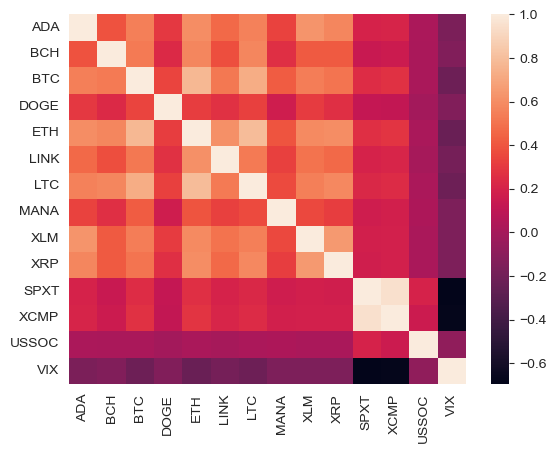

In [24]:
sns.heatmap(corr)